In [2]:
import numpy as np
import pandas as pd
import glob


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline


rc = {'axes.facecolor': '#E3DCD1',
      'font.family': 'Lucida Sans Unicode',
      'grid.linestyle': '-',
      'grid.linewidth': '0.75',
      'grid.color': '#ffffff',
      'mathtext.fontset': 'stixsans',
      'mathtext.sf': 'sans',
      'legend.frameon': True}
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('mathtext', fontset='stixsans', sf='sans')
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set(rc=rc)


## Outline for notebook

In this notebook we'll take advantage of the Schmidt data to consider what fraction of the proteome correspond to transcription factors, or nucleoid-associated proteins. There is some classical and more recent literature on how many DNA copies are present for a given growth rate and it'll be interesting to see how both DNA bound proteins and DNA content vary with growth rate. This for example would suggest how the 'effective' value for $N_ns$ should be viewed as we vary growth rate. 

Refs: 


## Load in data

In [3]:
# load in list of known or predicted TFs
EcoliTF = pd.read_csv('../../data/ecocyc_TF_EcoCyc_TF_query_20150712.csv', usecols=["Gene", "Protein Description"])
EcoliTF.head()

,Protein,Protein Description
0,kdpE,KdpE-Phosphorylated DNA-binding transcriptiona...
1,treR,TreR DNA-binding transcriptional repressor
2,glnG,NtrC-Phosphorylated DNA-binding transcriptiona...
3,zraR,ZraR-Phosphorylated DNA-binding transcriptiona...
4,creB,CreB-Phosphorylated DNA-binding transcriptiona...


In [83]:
# load in Schmidt data
combined_df = pd.read_csv('../../data/combined_copynumbers_Schmidt_Li_Tanguichi.csv')
combined_df = combined_df[combined_df.dataset == 'Schmidt']
combined_df.head()
# # load in the copy numbers (taken from SI table)
# schmidt_df = pd.read_csv('../../data/combined_copynumbers_Schmidt_Li_Tanguichi.csv')


,Unnamed: 0,Annotated functional COG class,Annotated functional COG group (description),Annotated functional COG groups (letter),Gene,condition,copy_number,copy_number_stdev,dataset,growth_rate,type
0,0,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Glucose,28502.0,4514.7168,Schmidt,0.58,ribosomal
1,1,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,LB,76877.0,1614.4170,Schmidt,1.90,ribosomal
2,2,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Glycerol + AA,47366.0,587.3384,Schmidt,1.27,ribosomal
3,3,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Acetate,11672.0,466.8800,Schmidt,0.30,ribosomal
4,4,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Fumarate,17445.0,439.6140,Schmidt,0.42,ribosomal


In [84]:
# Add column and note proteins that have a predicted (or known) DNA binding
# domain (from EcoCyc): compare list of genes for proteins quantitated in the 
# Schmidt data to list of genes with DNA binding motifs.
combined_df['TF_check'] = np.where(combined_df.Gene.isin(EcoliTF['Gene']), 'dna-associated', 'other')

In [85]:
combined_df.head()

,Unnamed: 0,Annotated functional COG class,Annotated functional COG group (description),Annotated functional COG groups (letter),Gene,condition,copy_number,copy_number_stdev,dataset,growth_rate,type,TF_check
0,0,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Glucose,28502.0,4514.7168,Schmidt,0.58,ribosomal,other
1,1,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,LB,76877.0,1614.4170,Schmidt,1.90,ribosomal,other
2,2,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Glycerol + AA,47366.0,587.3384,Schmidt,1.27,ribosomal,other
3,3,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Acetate,11672.0,466.8800,Schmidt,0.30,ribosomal,other
4,4,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Fumarate,17445.0,439.6140,Schmidt,0.42,ribosomal,other


We can begin by plotting the fraction of proteins that are DNA-associated versus growth rate.

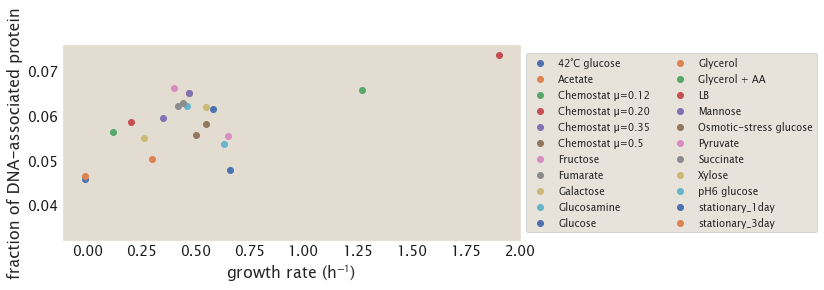

In [86]:
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111)

for cond, data in combined_df.groupby('condition'):
    
    dna_assoc_frac = data[data.TF_check == 'dna-associated'].copy_number.sum()/data.copy_number.sum()
    
    ax.scatter(data['growth_rate'].unique(),dna_assoc_frac, label = cond)
#     ax.set_ylim(1E6,1E7)    
    
ax.set_xlabel('growth rate (h$^{-1}$)', fontsize = 16)
ax.set_ylabel('fraction of DNA-associated protein', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(False)
plt.tick_params(which='major', width=1)
plt.tick_params(which='major', length=14)
ax.get_yaxis().set_tick_params(which='both', direction='in') 
ax.get_xaxis().set_tick_params(which='both', direction='in') 
ax.tick_params(axis='both', colors='white', labelcolor='k')

# plt.ylim(0,1E7)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
lgd = ax.legend( loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, ncol=2)

plt.tight_layout()
# plt.savefig('Schmidt_growthrate_vs_copy.pdf')

## Estimating genome equivalents for each growth rate

This was determined be extrapolating from a plot provided by RP and Hernan Garcia of gene copy number as a function of genomic position for several growth rates (30 min, 60 min, and 100 min). I was to dig into the literature and model this is based around some more, but this is a start.



In [87]:
# average genomic copy number
genome_copynum = {'Glucose':2.3, 
        'LB':3.27, 
        'Glycerol + AA':2.98, 
        'Acetate':1.29, 
        'Fumarate':1.55,
        'Glucosamine':1.64, 
        'Glycerol':1.64, 
        'Pyruvate':1.55, 
        'Chemostat µ=0.5':1.686,
        'Chemostat µ=0.35':1.42, 
        'Chemostat µ=0.20':1.00002, 
        'Chemostat µ=0.12':1.00001,
        'Osmotic-stress glucose':1.72, 
        '42°C glucose':1.85, 
        'pH6 glucose':1.81, 
        'Xylose':1.72,
        'Mannose':1.64, 
        'Galactose':1.11, 
        'Succinate':1.59, 
        'Fructose':1.81,
        'stationary_1day':1,
        'stationary_3day':1}

combined_df['genome_equv'] = combined_df['condition'].map(genome_copynum)

,Unnamed: 0,Gene,condition,copy_number,dataset,growth_rate,type,TF_check,genome_equv
0,0,rplA,Glucose,28502.0,Schmidt,0.58,ribosomal,other,2.30000
1,1,rplA,LB,76877.0,Schmidt,1.90,ribosomal,other,3.27000
2,2,rplA,Glycerol + AA,47366.0,Schmidt,1.27,ribosomal,other,2.98000
3,3,rplA,Acetate,11672.0,Schmidt,0.30,ribosomal,other,1.29000
4,4,rplA,Fumarate,17445.0,Schmidt,0.42,ribosomal,other,1.55000
5,5,rplA,Glucosamine,19397.0,Schmidt,0.46,ribosomal,other,1.64000
6,6,rplA,Glycerol,20511.0,Schmidt,0.47,ribosomal,other,1.64000
7,7,rplA,Pyruvate,15169.0,Schmidt,0.40,ribosomal,other,1.55000
8,8,rplA,Chemostat µ=0.5,17008.0,Schmidt,0.50,ribosomal,other,1.68600
9,9,rplA,Chemostat µ=0.35,12046.0,Schmidt,0.35,ribosomal,other,1.42000
